In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
from iminuit import Minuit, minuit
#from iminuit import 
from least_squares_lh import*
import time 
from datetime import datetime
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
ct_h2 = 5  # 0 : global, 1: cut umb; 2 : my cut; 5: cut_paper
ct_h1 = 'all'

lst = least_sq(ct_h2,ct_h1)
lst.mm = 1.115
#lst.data_cut = self.cut


In [4]:
lst.unp_wd = 0.2
lst.f2 = 'dss'

lst.coef = 0.27

lst.g_k_1h = 'log_b'
lst.g_k_2h = 'log_b' 

lst.mdl_den = 'gauss'
lst.mdl_num = 'gauss'

fit_type = 'hadron'

###################################à

##

In [5]:
nup = 0.1
ndo = -0.1
nst = -0.1
nsea = -0.2

aup = 0.
ado = 0.
ast = 1.
asea = 0.

bup = 1.
bdo = 0.
bst = 0.
bsea = 1.

pp=0.1
mss = 0.


In [7]:
if fit_type == 'hadron' : least_sq = lst.least_squares_lh
elif fit_type == 'both' : least_sq = lst.least_squares_ljh

fit6 = Minuit(least_sq, NUP= nup ,NDO= ndo,NST=nst,\
              NSEA=nsea,AUP=aup,ADO=ado,AST=ast,ASEA=asea,\
              BUP=bup,BDO=bdo,BST=bst,BSEA=bsea,PP=pp,MSS=mss)

In [8]:
fit6.errordef=1  # set = 1 for least-square minimization

##########################
#    limits

fit6.limits['NUP'] = (None,None)
fit6.limits['NDO'] = (None,None)
fit6.limits['NST'] = (None,None)
fit6.limits['NSEA'] = (None,None)

fit6.limits['AUP'] = (0, None)
fit6.limits['ADO'] = (0, None)
fit6.limits['AST'] = (0, None)
fit6.limits['ASEA'] = (0, None)

fit6.limits['BUP'] = (0, None)
fit6.limits['BDO'] = (0, None)
fit6.limits['BST'] = (0, None)
fit6.limits['BSEA'] = (0, None)

fit6.limits['PP'] = (0, 0.2)
fit6.limits['MSS'] = (None, None)

##########################
#  fix params

fit6.fixed['NUP'] = False
fit6.fixed['NDO'] = False
fit6.fixed['NST'] = False
fit6.fixed['NSEA'] = False

fit6.fixed['AUP'] = True
fit6.fixed['ADO'] = True
fit6.fixed['AST'] = False
fit6.fixed['ASEA'] = True

fit6.fixed['BUP'] = False
fit6.fixed['BDO'] = True
fit6.fixed['BST'] = True
fit6.fixed['BSEA'] = False

fit6.fixed['PP'] = False
fit6.fixed['MSS'] = True

##########################
#  step 


fit6.errors['NUP'] = 0.01
fit6.errors['NDO'] = 0.01
fit6.errors['NST'] = 0.01
fit6.errors['NSEA'] = 0.01

fit6.errors['AUP'] = 0.01
fit6.errors['ADO'] = 0.01
fit6.errors['AST'] = 0.01
fit6.errors['ASEA'] = 0.01

fit6.errors['BUP'] = 0.01
fit6.errors['BDO'] = 0.01
fit6.errors['BST'] = 0.01
fit6.errors['BSEA'] = 0.01

fit6.errors['PP'] = 0.01


In [9]:
fit6.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,NUP,0.10,0.01,,,-1,1,
1,NDO,-0.10,0.01,,,-1,1,
2,NST,-0.10,0.01,,,-1,1,
3,NSEA,-0.20,0.01,,,-1,1,
4,AUP,0.00,0.01,,,0,,yes
5,ADO,0.00,0.01,,,0,,yes
6,AST,1.00,0.01,,,0,,
7,ASEA,0.00,0.01,,,0,,yes
8,BUP,1.00,0.01,,,0,,
9,BDO,0.00,0.01,,,0,,yes


In [ ]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
start = time.time()

fit6.migrad(2000)

end = time.time()
mins=(end -start)/60
print('¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯')
print('time passed:')

print(str(end - start) +'   ' + 'sec')
print(str((end - start)/60) +'   ' + 'min')



Current Time = 15:43:28


In [ ]:
clm = fit6.parameters
clm = list(clm)
clm.append('coef')
clm.append('chi_sq')
df = pd.DataFrame(columns = clm)


values = np.array(fit6.values)
values = np.append(values,lst.coef)

chi_dof = fit6.fval/(len(lst.z2) - fit6.nfit)
chi_dof = round(chi_dof,3)
values = np.append(values,chi_dof)


df.loc[len(df), :] = values


#df.to_csv(r'fit_parameters/fit_'+str(fit_type)+'_coef_'+ str(lst.coef)+'_chi_'+str(chi_dof)+'.csv',index=False)


In [ ]:
lst.coef
chi_dof

In [ ]:
pwd

In [ ]:
df

In [ ]:
fit6.fmin

In [ ]:
fit6.covariance

In [ ]:
print( 'reduced chi-square = ' + str( fit6.fval/(len(lst.z2) - fit6.nfit) ))

In [14]:
fit6.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,NUP,0.7,1.5,,,-1,1,
1,NDO,-0.6,1.2,,,-1,1,
2,NST,-1.0,1.3,,,-1,1,
3,NSEA,-0.4,1.3,,,-1,1,
4,AUP,0.00,0.01,,,0,,yes
5,ADO,0.00,0.01,,,0,,yes
6,AST,2.2,1.0,,,0,,
7,ASEA,0.00,0.01,,,0,,yes
8,BUP,3.7,1.3,,,0,,
9,BDO,0.00,0.01,,,0,,yes


In [15]:
pwd

'/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution'

In [16]:
print(fit6.accurate)
print(fit6.valid)

print(repr(fit6.fmin))

True
True
<FMin algorithm='Migrad' edm=3.1106339262556535e-05 edm_goal=0.0002 errordef=1.0 fval=115.34805951689424 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=True has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=1653 ngrad=0 reduced_chi2=nan>


In [17]:
fit6.covariance.correlation()


,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP
NUP,1,0.381,0.00101,-0.837,0,0,0.362,0,0.959,0,0,0.787,0.443
NDO,0.381,1,0.00265,-0.543,0,0,0.665,0,0.456,0,0,0.433,0.721
NST,0.00101,0.00265,1,-0.00257,0,0,-0.00418,0,0.00194,0,0,0.00348,0.00512
NSEA,-0.837,-0.543,-0.00257,1,0,0,-0.582,0,-0.834,0,0,-0.954,-0.708
AUP,0,0,0,0,0,0,0,0,0,0,0,0,0
ADO,0,0,0,0,0,0,0,0,0,0,0,0,0
AST,0.362,0.665,-0.00418,-0.582,0,0,1,0,0.44,0,0,0.568,0.908
ASEA,0,0,0,0,0,0,0,0,0,0,0,0,0
BUP,0.959,0.456,0.00194,-0.834,0,0,0.44,0,1,0,0,0.843,0.545
BDO,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
start = time.time()
#fit6.migrad(2000)

Current Time = 12:27:39


(array([0.38110206, 0.38560688, 0.39011169, 0.3946165 , 0.39912132,
        0.40362613, 0.40813094, 0.41263576, 0.41714057, 0.42164538,
        0.42615019, 0.43065501, 0.43515982, 0.43966463, 0.44416945,
        0.44867426, 0.45317907, 0.45768389, 0.4621887 , 0.46669351,
        0.47119832, 0.47570314, 0.48020795, 0.48471276, 0.48921758,
        0.49372239, 0.4982272 , 0.50273202, 0.50723683, 0.51174164,
        0.51624646, 0.52075127, 0.52525608, 0.52976089, 0.53426571,
        0.53877052, 0.54327533, 0.54778015, 0.55228496, 0.55678977,
        0.56129459, 0.5657994 , 0.57030421, 0.57480903, 0.57931384,
        0.58381865, 0.58832346, 0.59282828, 0.59733309, 0.6018379 ,
        0.60634272, 0.61084753, 0.61535234, 0.61985716, 0.62436197,
        0.62886678, 0.6333716 , 0.63787641, 0.64238122, 0.64688603,
        0.65139085, 0.65589566, 0.66040047, 0.66490529, 0.6694101 ,
        0.67391491, 0.67841973, 0.68292454, 0.68742935, 0.69193417,
        0.69643898, 0.70094379, 0.7054486 , 0.70

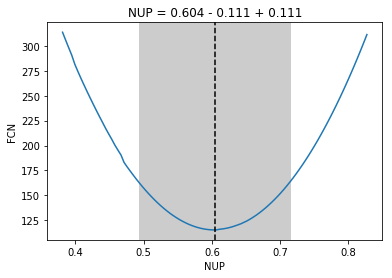

In [17]:
fit6.draw_profile('NUP')

In [18]:
#fit6.draw_profile('BUP')


In [32]:
ct_h2 = 5  # 0 : global, 1: cut umb; 2 : my cut; 5: cut_paper
ct_h1 = 'all'

lst = least_sq(ct_h2,ct_h1)
lst.mm = 1.115
#lst.data_cut = self.cutold
lst.unp_wd = 0.2
lst.f2 = 'dss'

lst.coef = 0.27

lst.g_k_1h = 'old'
lst.g_k_2h = 'old' 

lst.mdl = 'gauss'

fit_type = 'both'

###################################à

nup = 0.1
ndo = -0.1
nst = -0.1
nsea = -0.2

aup = 0.
ado = 0.
ast = 1.
asea = 0.

bup = 1.
bdo = 0.
bst = 0.
bsea = 1.

pp=0.1
mss = 0.
##

In [33]:
fit6 = Minuit(lst.least_squares_lh, NUP= nup ,NDO= ndo,NST=nst,\
              NSEA=nsea,AUP=aup,ADO=ado,AST=ast,ASEA=asea,\
              BUP=bup,BDO=bdo,BST=bst,BSEA=bsea,PP=pp)

In [34]:
fit6.errordef=1

####___limits

fit6.limits['NUP'] = (-1, 1)
fit6.limits['NDO'] = (-1, 1)
fit6.limits['NST'] = (-1, 1)
fit6.limits['NSEA'] = (-1, 1)

fit6.limits['AUP'] = (0, None)
fit6.limits['ADO'] = (0, None)
fit6.limits['AST'] = (0, None)
fit6.limits['ASEA'] = (0, None)

fit6.limits['BUP'] = (0, None)
fit6.limits['BDO'] = (0, None)
fit6.limits['BST'] = (0, None)
fit6.limits['BSEA'] = (0, None)

fit6.limits['PP'] = (0, lst.unp_wd)
#fit6.limits['MSS'] = (None, None)

##########################################à
fit6.fixed['NUP'] = False
fit6.fixed['NDO'] = False
fit6.fixed['NST'] = False
fit6.fixed['NSEA'] = False

fit6.fixed['AUP'] = True
fit6.fixed['ADO'] = True
fit6.fixed['AST'] = False
fit6.fixed['ASEA'] = True

fit6.fixed['BUP'] = False
fit6.fixed['BDO'] = True
fit6.fixed['BST'] = True
fit6.fixed['BSEA'] = False

fit6.fixed['PP'] = False
#fit6.fixed['MSS'] = True

##########

fit6.errors['NUP'] = 0.01
fit6.errors['NDO'] = 0.01
fit6.errors['NST'] = 0.01
fit6.errors['NSEA'] = 0.01

fit6.errors['AUP'] = 0.01
fit6.errors['ADO'] = 0.01
fit6.errors['AST'] = 0.01
fit6.errors['ASEA'] = 0.01

fit6.errors['BUP'] = 0.01
fit6.errors['BDO'] = 0.01
fit6.errors['BST'] = 0.01
fit6.errors['BSEA'] = 0.01

fit6.erros['PP'] = 0.01

In [35]:
fit6.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,NUP,0.10,0.01,,,-1,1,
1,NDO,-0.10,0.01,,,-1,1,
2,NST,-0.10,0.01,,,-1,1,
3,NSEA,-0.20,0.01,,,-1,1,
4,AUP,0.00,0.01,,,0,,yes
5,ADO,0.00,0.01,,,0,,yes
6,AST,1.00,0.01,,,0,,
7,ASEA,0.00,0.01,,,0,,yes
8,BUP,1.00,0.01,,,0,,
9,BDO,0.00,0.01,,,0,,yes


In [36]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
start = time.time()

fit6.migrad(3000)

end = time.time()
mins=(end -start)/60
print('¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯')
print('time passed:')

print(str(end - start) +'   ' + 'sec')
print(str((end - start)/60) +'   ' + 'min')



Current Time = 13:11:36
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
time passed:
1001.9826979637146   sec
16.699711632728576   min


In [37]:
fit6.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112                        │             Nfcn = 1071              │
│ EDM = 0.000195 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘

In [38]:
fit6.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,NUP,0.68,0.08,,,-1,1,
1,NDO,-0.62,0.06,,,-1,1,
2,NST,-1.0,0.2,,,-1,1,
3,NSEA,-0.403,0.028,,,-1,1,
4,AUP,0.00,0.01,,,0,,yes
5,ADO,0.00,0.01,,,0,,yes
6,AST,2.22,0.09,,,0,,
7,ASEA,0.00,0.01,,,0,,yes
8,BUP,3.5,0.5,,,0,,
9,BDO,0.00,0.01,,,0,,yes


In [39]:
fit6.covariance

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP
NUP,0.00666,0.00193 (0.398),7.15e-06 (0.039),-0.00107 (-0.477),0,0,-7.41e-05 (-0.010),0,0.0339 (0.892),0,0,0.000103 (0.011),0
NDO,0.00193 (0.398),0.00353,-1.48e-06 (-0.011),-0.000944 (-0.578),0,0,3.38e-05 (0.006),0,0.0118 (0.425),0,0,-3.84e-05 (-0.006),0
NST,7.15e-06 (0.039),-1.48e-06 (-0.011),4.97e-06,-2.38e-06 (-0.039),0,0,-1.26e-05 (-0.064),0,3.49e-05 (0.034),0,0,1.7e-05 (0.067),0
NSEA,-0.00107 (-0.477),-0.000944 (-0.578),-2.38e-06 (-0.039),0.000756,0,0,0.000484 (0.199),0,-0.0025 (-0.196),0,0,-0.000628 (-0.200),0
AUP,0,0,0,0,0,0,0,0,0,0,0,0,0
ADO,0,0,0,0,0,0,0,0,0,0,0,0,0
AST,-7.41e-05 (-0.010),3.38e-05 (0.006),-1.26e-05 (-0.064),0.000484 (0.199),0,0,0.00784,0,-0.00357 (-0.087),0,0,-0.0101 (-0.998),0
ASEA,0,0,0,0,0,0,0,0,0,0,0,0,0
BUP,0.0339 (0.892),0.0118 (0.425),3.49e-05 (0.034),-0.0025 (-0.196),0,0,-0.00357 (-0.087),0,0.217,0,0,0.00463 (0.087),0
BDO,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
print( 'reduced chi-square = ' + str( fit6.fval/(len(lst.z2) - fit6.nfit) ))

reduced chi-square = 1.2589235777049996


In [41]:
fit6.parameters

('NUP',
 'NDO',
 'NST',
 'NSEA',
 'AUP',
 'ADO',
 'AST',
 'ASEA',
 'BUP',
 'BDO',
 'BST',
 'BSEA',
 'PP')

In [29]:
clm = fit6.parameters
clm = list(clm)
clm.append('coef')
clm.append('chi_sq')
df = pd.DataFrame(columns = clm)


values = np.array(fit6.values)
values = np.append(values,lst.coef)

chi_dof = fit6.fval/(len(lst.z2) - fit6.nfit)
chi_dof = round(chi_dof,3)
values = np.append(values,chi_dof)


df.loc[len(df), :] = values


#df.to_csv(r'fit_parameters/fit_'+str(fit_type)+'_coef_'+ str(lst.coef)+'_chi_'+str(chi_dof)+'.csv',index=False)


In [30]:
df

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,coef,chi_sq
0,0.747416,-0.69689,-0.999739,-0.403651,0,0,2.05222,0,3.77571,0,0,2.25212,0.1,0.27,1.337


In [42]:
fit6.covariance.correlation()

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP
NUP,1,0.398,0.0393,-0.477,0,0,-0.0102,0,0.892,0,0,0.011,0
NDO,0.398,1,-0.0112,-0.578,0,0,0.00643,0,0.425,0,0,-0.00566,0
NST,0.0393,-0.0112,1,-0.0388,0,0,-0.0637,0,0.0337,0,0,0.0668,0
NSEA,-0.477,-0.578,-0.0388,1,0,0,0.199,0,-0.196,0,0,-0.2,0
AUP,0,0,0,0,0,0,0,0,0,0,0,0,0
ADO,0,0,0,0,0,0,0,0,0,0,0,0,0
AST,-0.0102,0.00643,-0.0637,0.199,0,0,1,0,-0.0866,0,0,-0.998,0
ASEA,0,0,0,0,0,0,0,0,0,0,0,0,0
BUP,0.892,0.425,0.0337,-0.196,0,0,-0.0866,0,1,0,0,0.0873,0
BDO,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
fit6.minos()

KeyboardInterrupt: 

In [44]:
pwd

'/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution'